In [1]:
#import modules
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
chess_data = pd.read_csv('./datacleaned.csv')

In [3]:
chess_data = chess_data.drop(chess_data.columns[[0,2]], axis=1)

In [4]:
chess_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19113 entries, 0 to 19112
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   black_rating    19113 non-null  int64 
 1   rated           19113 non-null  bool  
 2   turns           19113 non-null  int64 
 3   victory_status  19113 non-null  object
 4   white_rating    19113 non-null  int64 
 5   winner          19113 non-null  object
dtypes: bool(1), int64(3), object(2)
memory usage: 765.4+ KB


In [5]:
dummy = pd.get_dummies(chess_data['victory_status'])

In [6]:
chess_with_dummy = pd.concat([chess_data, dummy], axis=1)
chess_with_dummy.head()

,black_rating,rated,turns,victory_status,white_rating,winner,draw,mate,outoftime,resign
0,1191,False,13,outoftime,1500,white,0,0,1,0
1,1261,True,16,resign,1322,black,0,0,0,1
2,1500,True,61,mate,1496,white,0,1,0,0
3,1454,True,61,mate,1439,white,0,1,0,0
4,1469,True,95,mate,1523,white,0,1,0,0


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
scaler= StandardScaler()
scaler.fit(chess_with_dummy[['black_rating']])
print(scaler.mean_)
chess_with_dummy['black_ss'] = scaler.transform(chess_with_dummy[['black_rating']])

[1590.04551876]


In [9]:
scaler.fit(chess_with_dummy[['white_rating']])
print(scaler.mean_)
chess_with_dummy['white_ss'] = scaler.transform(chess_with_dummy[['white_rating']])
scaler.fit(chess_with_dummy[['turns']])
print(scaler.mean_)
chess_with_dummy['turns_ss'] = scaler.transform(chess_with_dummy[['turns']])

[1597.30000523]
[60.51383875]


In [10]:
y = chess_with_dummy.pop('winner')
X = chess_with_dummy.drop(columns=['victory_status'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19113 entries, 0 to 19112
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   black_rating  19113 non-null  int64  
 1   rated         19113 non-null  bool   
 2   turns         19113 non-null  int64  
 3   white_rating  19113 non-null  int64  
 4   draw          19113 non-null  uint8  
 5   mate          19113 non-null  uint8  
 6   outoftime     19113 non-null  uint8  
 7   resign        19113 non-null  uint8  
 8   black_ss      19113 non-null  float64
 9   white_ss      19113 non-null  float64
 10  turns_ss      19113 non-null  float64
dtypes: bool(1), float64(3), int64(3), uint8(4)
memory usage: 989.4 KB


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#finished loading train test data


Accuracy of Logistic Regression: 0.656552445723254
Precision of Logistic Regression: 0.6569280129710147
Recall of Logistic Regression: 0.656552445723254
F1 of Logistic Regression: 0.6560507856822165


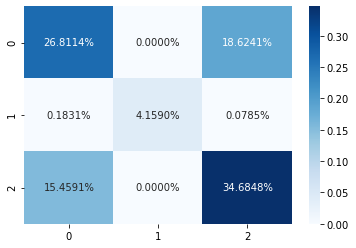

In [19]:
#Logistic Regression
import seaborn as sns
import numpy as np
import sklearn.metrics as m

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
print('Accuracy of Logistic Regression: {}'.format(m.accuracy_score(y_test,lr_y_pred)))
print('Precision of Logistic Regression: {}'.format(m.precision_score(y_test,lr_y_pred, average='weighted')))
print('Recall of Logistic Regression: {}'.format(m.recall_score(y_test,lr_y_pred, average='weighted')))
print('F1 of Logistic Regression: {}'.format(m.f1_score(y_test,lr_y_pred, average='weighted')))
cf_matrix = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues', fmt='.4%')

Accuracy of Naive Bayes: 0.656552445723254
Precision of Naive Bayes: 0.6569280129710147
Recall of Naive Bayes: 0.656552445723254
F1 of Naive Bayes: 0.6560507856822165


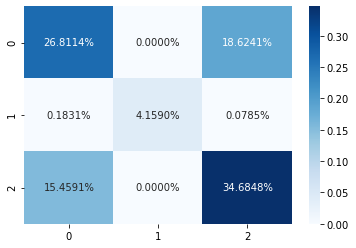

In [20]:
#Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = lr.predict(X_test)
print('Accuracy of Naive Bayes: {}'.format(m.accuracy_score(y_test,nb_y_pred)))
print('Precision of Naive Bayes: {}'.format(m.precision_score(y_test,nb_y_pred, average='weighted')))
print('Recall of Naive Bayes: {}'.format(m.recall_score(y_test,nb_y_pred, average='weighted')))
print('F1 of Naive Bayes: {}'.format(m.f1_score(y_test,nb_y_pred, average='weighted')))
cf_matrix = confusion_matrix(y_test, nb_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues', fmt='.4%')

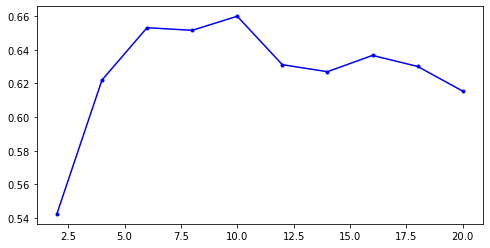

In [25]:
#Decision Tree
#Find best number of branches
import matplotlib.pyplot as plt
results = []
max_depth_branches = [2,4,6,8,10,12,14,16,18,20]
for branches in max_depth_branches:
    model = DecisionTreeClassifier(max_depth=branches, random_state=42)
    model.fit(X_train, y_train)
    dt_y_pred = model.predict(X_test)
    accuracy = np.mean(y_test == dt_y_pred)
    results.append(accuracy)
    
plt.figure(figsize=(8,4))
pd.Series(results, max_depth_branches).plot(color="blue",marker=".")

Accuracy of Decision Tree: 0.6599529165576772
Precision of Decision Tree: 0.6607792954885098
Recall of Decision Tree: 0.6599529165576772
F1 of Decision Tree: 0.658113711440929


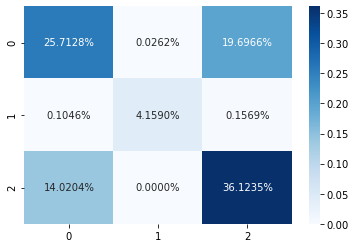

In [26]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
print('Accuracy of Decision Tree: {}'.format(m.accuracy_score(y_test,dt_y_pred)))
print('Precision of Decision Tree: {}'.format(m.precision_score(y_test,dt_y_pred, average='weighted')))
print('Recall of Decision Tree: {}'.format(m.recall_score(y_test,dt_y_pred, average='weighted')))
print('F1 of Decision Tree: {}'.format(m.f1_score(y_test,dt_y_pred, average='weighted')))
cf_matrix = confusion_matrix(y_test, dt_y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues', fmt='.4%')

In [29]:
modelResults = [
    ["Decision Tree",
     m.accuracy_score(y_test,dt_y_pred),
     m.precision_score(y_test,dt_y_pred, average='weighted'),
     m.recall_score(y_test,dt_y_pred, average='weighted'),
     m.f1_score(y_test,dt_y_pred, average='weighted')],
    ["Naive Bayes",
     m.accuracy_score(y_test,nb_y_pred),
     m.precision_score(y_test,nb_y_pred, average='weighted'),
     m.recall_score(y_test,nb_y_pred, average='weighted'),
     m.f1_score(y_test,nb_y_pred, average='weighted')],
    ["Logistic Regression",
     m.accuracy_score(y_test,lr_y_pred),
     m.precision_score(y_test,lr_y_pred, average='weighted'),
     m.recall_score(y_test,lr_y_pred, average='weighted'),
     m.f1_score(y_test,lr_y_pred, average='weighted')]
]

pd.DataFrame(modelResults, columns=["Model","Accuracy","Precision","Recall","F1"])

,Model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.659953,0.660779,0.659953,0.658114
1,Naive Bayes,0.656552,0.656928,0.656552,0.656051
2,Logistic Regression,0.656552,0.656928,0.656552,0.656051


In [ ]:
#The best model was the Decision Tree model but not by much